# 0. Ubicación y acceso al código

El código y los diferentes datasets utilizados en esta práctica pueden ser consultados en el repositorio de GitHub creado para tal efecto: https://github.com/DataCiriano/Web-Scraping/tree/main/Pr%C3%A1ctica%202

# 1. Descripción del Dataset

### ¿Por qué es importante y qué pregunta/problema pretende responder?

El dataset recoge información sobre diferentes ayudas y subvenciones otorgadas en el Reino de España por diferentes organismos públicos para el año 2024. En este ejercicio vamos a estudiar cómo ha sido la concesión de estos fondos públicos y qué variables son las más importantes. Por último, trataremos de modelar los datos para descubrir patrones y poder predecir la concesión de ayudas futuras..

El dataset original entregado en la práctica 1,  consta de 378.958 registros únicos y 18 campos que muestran diferente información referente a cada ayuda o subvención entregada en el año 2024 hasta octubre.

Utilizaremos otro dataset complementario con la misma estructura para añadir los datos de los últimos meses del año que no se encuentran en el dataset original.

#### Descripción campos:

&nbsp;&nbsp;&nbsp;&nbsp;**Convocante:** Entidad o administración pública que ha convocado la ayuda o subvención.  
&nbsp;&nbsp;&nbsp;&nbsp;**Convocatoria:** Nombre o título específico de la convocatoria bajo la cual se ha otorgado la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Código BDNS:** Identificador único asignado por la Base de Datos Nacional de Subvenciones (BDNS) a cada ayuda o subvención.  
&nbsp;&nbsp;&nbsp;&nbsp;**Reglamento:** Normativa o disposición legal que regula la concesión de la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Objetivo de la ayuda:** Propósitos o metas que la ayuda pretende alcanzar.  
&nbsp;&nbsp;&nbsp;&nbsp;**Instrumento de la ayuda:** Modalidad o tipo de apoyo proporcionado, como subvenciones directas, préstamos, garantías, etc.  
&nbsp;&nbsp;&nbsp;&nbsp;**Tipo de empresa:** Clasificación de la empresa beneficiaria según su tamaño o características, como microempresa, pyme o gran empresa.  
&nbsp;&nbsp;&nbsp;&nbsp;**Fecha de concesión:** Fecha en la que se aprobó la concesión de la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Código de concesión:** Número o identificador específico asignado a la concesión individual de la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Fecha de registro:** Fecha en la que la concesión fue registrada en la BDNS.  
&nbsp;&nbsp;&nbsp;&nbsp;**Beneficiario:** Nombre de la persona física o jurídica que recibe la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Importe nominal:** Cantidad total de dinero asignada en la concesión de la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Ayuda equivalente:** Valor de la ayuda expresado en términos de subvención equivalente, especialmente relevante en ayudas que no son subvenciones directas.  
&nbsp;&nbsp;&nbsp;&nbsp;**Región concesión:** Ubicación geográfica donde se aplica o tiene efecto la ayuda concedida.  
&nbsp;&nbsp;&nbsp;&nbsp;**Sector de actividad NACE:** Clasificación del sector económico del beneficiario según la Nomenclatura Estadística de Actividades Económicas de la Comunidad Europea (NACE).  
&nbsp;&nbsp;&nbsp;&nbsp;**Referencia de la medida:** Código o identificador de la medida específica bajo la cual se enmarca la ayuda.  
&nbsp;&nbsp;&nbsp;&nbsp;**Entidad art. 16 GBER:** Entidad relacionada según el artículo 16 del Reglamento General de Exención por Categorías (GBER) de la Unión Europea.  
&nbsp;&nbsp;&nbsp;&nbsp;**Intermediario art. 21 GBER:** Intermediario financiero o entidad que participa en la concesión de la ayuda según el artículo 21 del GBER.  


# 2.  Integración y selección

El dataset original entregado en la práctica 1 contiene datos desde enero hasta octubre del año 2024, por lo que para esta nueva entrega se han extraído por el mimos método de Web Scraping los datos de estos últimos meses del año 2024 y se realiza la unión de los dos dataset en uno solo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar las librerías necesarias
import pandas as pd

In [ ]:
# carga del dataset original
datos_practica1 = pd.read_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset.csv")

<ipython-input-3-625dd19bb969>:2: DtypeWarning: Columns (4,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_practica1 = pd.read_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset.csv")


In [ ]:
# comprobar que el dataset se cargó correctamente
datos_practica1.shape

(378958, 18)

In [ ]:
# carga de los datos de los últimos meses de 2024
nuevos_datos = pd.read_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/ultimas_adjudicaciones_dataset.csv")

In [ ]:
# comprobar que el dataset se cargó correctamente
nuevos_datos.shape

(30000, 18)

In [ ]:
# dar formato de fecha al campo 'Fecha de concesión'
nuevos_datos['Fecha de concesión'] = pd.to_datetime(nuevos_datos['Fecha de concesión'], format='%d/%m/%Y')

In [ ]:
# filtrar los datos de los meses Octubre, Noviembe y Diciembre
nuevos_datos = nuevos_datos[nuevos_datos['Fecha de concesión'].dt.month >= 10]

In [ ]:
nuevos_datos.shape

(30000, 18)

In [ ]:
# unir los dos conjuntos de datos en uno solo y eliminar los posibles duplicados
data = pd.concat([datos_practica1, nuevos_datos], ignore_index=True)

In [ ]:
# eliminar los posibles duplicados
data = data.drop_duplicates()

# 3. Limpieza de los datos

## 3.1 Análisis exploratorio

In [ ]:
# visualizar la estructura del dataset
data.shape

(408958, 18)

In [ ]:
# comprobación de que no hay registros duplicados
duplicados = data.duplicated().sum()
duplicados

0

In [ ]:
# información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408958 entries, 0 to 408957
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Convocante                  408958 non-null  object
 1   Convocatoria                408958 non-null  object
 2   Código BDNS                 408958 non-null  int64 
 3   Reglamento                  408958 non-null  object
 4   Objetivos de la ayuda       40645 non-null   object
 5   Instrumentos de ayuda       408958 non-null  object
 6   Tipo de Empresa             408623 non-null  object
 7   Fecha de concesión          408958 non-null  object
 8   Código de concesión         408958 non-null  object
 9   Fecha de registro           408958 non-null  object
 10  Beneficiario                408958 non-null  object
 11  Importe nominal             408958 non-null  object
 12  Ayuda equivalente           408958 non-null  object
 13  Región concesión            4

Vemos como hay varios campos con valores faltantes que deberemos limpiar.

In [ ]:
# previsualizar los primeros registros del dataset
data.head()

,Convocante,Convocatoria,Código BDNS,Reglamento,Objetivos de la ayuda,Instrumentos de ayuda,Tipo de Empresa,Fecha de concesión,Código de concesión,Fecha de registro,Beneficiario,Importe nominal,Ayuda equivalente,Región concesión,Sector de actividad NACE,Referencia de la medida,Entidad art. 16 GBER,Intermediario art. 21 GBER
0,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,NaN,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,26/05/2024,SB106987200,28/05/2024,P1932400C - AYTO. TIERZO,"5.665,79 €","5.665,79 €",ES424 - Guadalajara,NaN,SA.43021,NaN,NaN
1,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,NaN,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,26/05/2024,SB106987199,28/05/2024,P1932100I - AYUNTAMIENTO DE TENDILLA,"6.179,84 €","6.179,84 €",ES424 - Guadalajara,NaN,SA.43021,NaN,NaN
2,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,NaN,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,26/05/2024,SB106987198,28/05/2024,P1932000A - AYTO. TARTANEDO,"5.383,85 €","5.383,85 €",ES424 - Guadalajara,NaN,SA.43021,NaN,NaN
3,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,NaN,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,26/05/2024,SB106987197,28/05/2024,P1931000B - AYTO. SIGUENZA,"2.483,26 €","2.483,26 €",ES424 - Guadalajara,NaN,SA.43021,NaN,NaN
4,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,NaN,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,26/05/2024,SB106987196,28/05/2024,P1928100E - AYTO. RENERA,"6.742,01 €","6.742,01 €",ES424 - Guadalajara,NaN,SA.43021,NaN,NaN


In [ ]:
# eliminar varias columnas que no interesan
data = data.drop(columns=['Objetivos de la ayuda', 'Referencia de la medida', 'Entidad art. 16 GBER', 'Intermediario art. 21 GBER'])

Se eliminan las columnas 'Objetivos de la ayuda', 'Referencia de la medida', 'Entidad art. 16 GBER' e 'Intermediario art. 21 GBER' ya que tienen demasiados valores nulos y los que tenemos no aportan información relevante para nuestro análisis.

In [ ]:
# comprobar que la columnas se eliminaron correctamente
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408958 entries, 0 to 408957
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Convocante                408958 non-null  object
 1   Convocatoria              408958 non-null  object
 2   Código BDNS               408958 non-null  int64 
 3   Reglamento                408958 non-null  object
 4   Instrumentos de ayuda     408958 non-null  object
 5   Tipo de Empresa           408623 non-null  object
 6   Fecha de concesión        408958 non-null  object
 7   Código de concesión       408958 non-null  object
 8   Fecha de registro         408958 non-null  object
 9   Beneficiario              408958 non-null  object
 10  Importe nominal           408958 non-null  object
 11  Ayuda equivalente         408958 non-null  object
 12  Región concesión          408958 non-null  object
 13  Sector de actividad NACE  406272 non-null  object
dtypes: i

In [ ]:
# convertir la columna 'Fecha de concesión' a un formato de fecha
data['Fecha de concesión'] = pd.to_datetime(data['Fecha de concesión'], format='%d/%m/%Y')

In [ ]:
# filtrar los registros del año 2024
data = data[data['Fecha de concesión'].dt.year == 2024]

Se realiza el filtrado de los registros que no pertenecen a 2024 respecto a la fecha de concesión de la ayuda o subvención ya que durante el proceso de extracción mediante webscraping se obtuvieron registros de finales del año 2023.

In [ ]:
# comprobar si se siguen teniendo valores faltantes despues del filtrado
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373842 entries, 0 to 408957
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Convocante                373842 non-null  object        
 1   Convocatoria              373842 non-null  object        
 2   Código BDNS               373842 non-null  int64         
 3   Reglamento                373842 non-null  object        
 4   Instrumentos de ayuda     373842 non-null  object        
 5   Tipo de Empresa           373507 non-null  object        
 6   Fecha de concesión        373842 non-null  datetime64[ns]
 7   Código de concesión       373842 non-null  object        
 8   Fecha de registro         373842 non-null  object        
 9   Beneficiario              373842 non-null  object        
 10  Importe nominal           373842 non-null  object        
 11  Ayuda equivalente         373842 non-null  object        
 12  Región 

In [ ]:
# manejo de valores faltantes con la creación de la etiqueta 'Desconocido'
data['Tipo de Empresa'] = data['Tipo de Empresa'].fillna('Desconocido')
data['Sector de actividad NACE'] = data['Sector de actividad NACE'].fillna('Desconocido')

Se crea la etiqueta 'Desconocido' para los valores faltantes de los campos 'Tipo de Empresa' y 'Sector de actividad NACE' ya que es complicado imputar valores faltantes con sentido y no se desean eliminar estos registros.
En total se tienen 227 registros con valores faltantes en el campo 'Tipo de Empresa' y 1944 valores en 'Sector de actividad NACE'.

In [ ]:
# comprobar que ya no existen valores faltantes en el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373842 entries, 0 to 408957
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Convocante                373842 non-null  object        
 1   Convocatoria              373842 non-null  object        
 2   Código BDNS               373842 non-null  int64         
 3   Reglamento                373842 non-null  object        
 4   Instrumentos de ayuda     373842 non-null  object        
 5   Tipo de Empresa           373842 non-null  object        
 6   Fecha de concesión        373842 non-null  datetime64[ns]
 7   Código de concesión       373842 non-null  object        
 8   Fecha de registro         373842 non-null  object        
 9   Beneficiario              373842 non-null  object        
 10  Importe nominal           373842 non-null  object        
 11  Ayuda equivalente         373842 non-null  object        
 12  Región 

Ahora que ya tenemos todos los datos rellenados, vamos a eliminar también símbolos innecesarios como '€' para que los importes se puedan reconocer como valores y no texto

In [ ]:
data['Importe nominal'] = data['Importe nominal'].str.replace('€', '', regex=False)
data['Importe nominal'] = data['Importe nominal'].str.replace('.', '', regex=False)
data['Importe nominal'] = data['Importe nominal'].str.replace(',', '.', regex=False)
data['Importe nominal'] = pd.to_numeric(data['Importe nominal'])

data['Ayuda equivalente'] = data['Ayuda equivalente'].str.replace('€', '', regex=False)
data['Ayuda equivalente'] = data['Ayuda equivalente'].str.replace('.', '', regex=False)
data['Ayuda equivalente'] = data['Ayuda equivalente'].str.replace(',', '.', regex=False)
data['Ayuda equivalente'] = pd.to_numeric(data['Ayuda equivalente'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373842 entries, 0 to 408957
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Convocante                373842 non-null  object        
 1   Convocatoria              373842 non-null  object        
 2   Código BDNS               373842 non-null  int64         
 3   Reglamento                373842 non-null  object        
 4   Instrumentos de ayuda     373842 non-null  object        
 5   Tipo de Empresa           373842 non-null  object        
 6   Fecha de concesión        373842 non-null  datetime64[ns]
 7   Código de concesión       373842 non-null  object        
 8   Fecha de registro         373842 non-null  object        
 9   Beneficiario              373842 non-null  object        
 10  Importe nominal           373842 non-null  float64       
 11  Ayuda equivalente         373842 non-null  float64       
 12  Región 

Como podemos ver, ahora ya se reconocen los valores como númericos

In [ ]:
data.to_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset_limpio.csv")

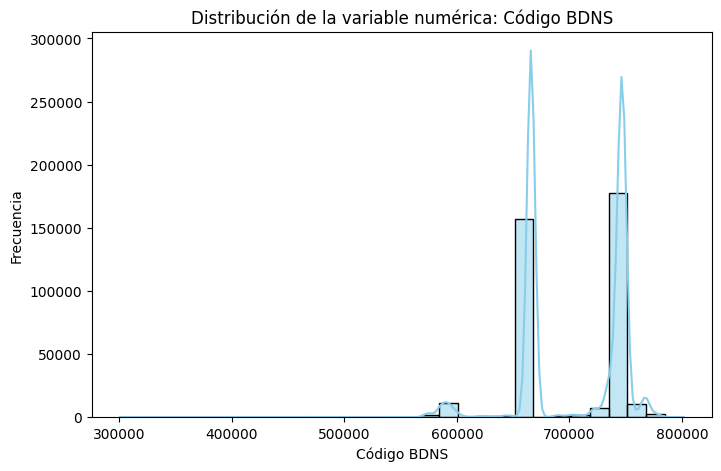

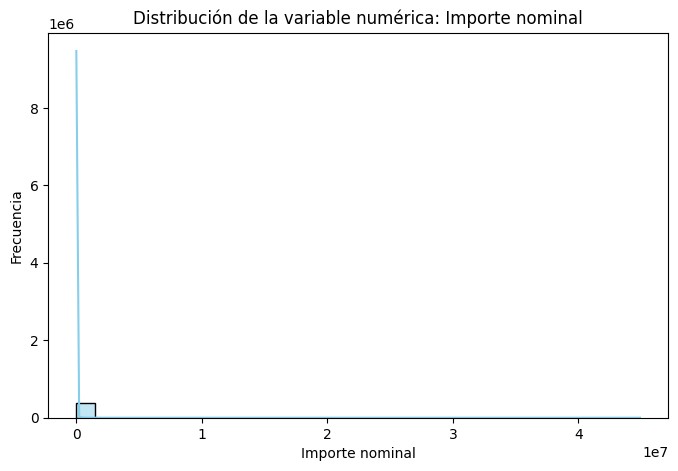

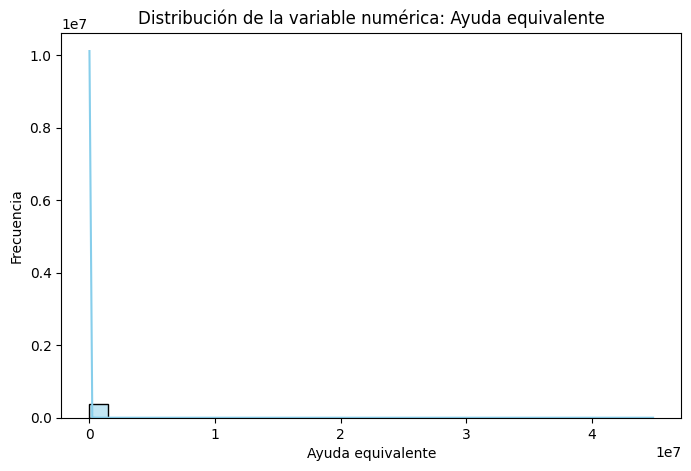

<ipython-input-25-70cb0d18728b>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(data[col]) or pd.api.types.is_categorical_dtype(data[col])]
<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


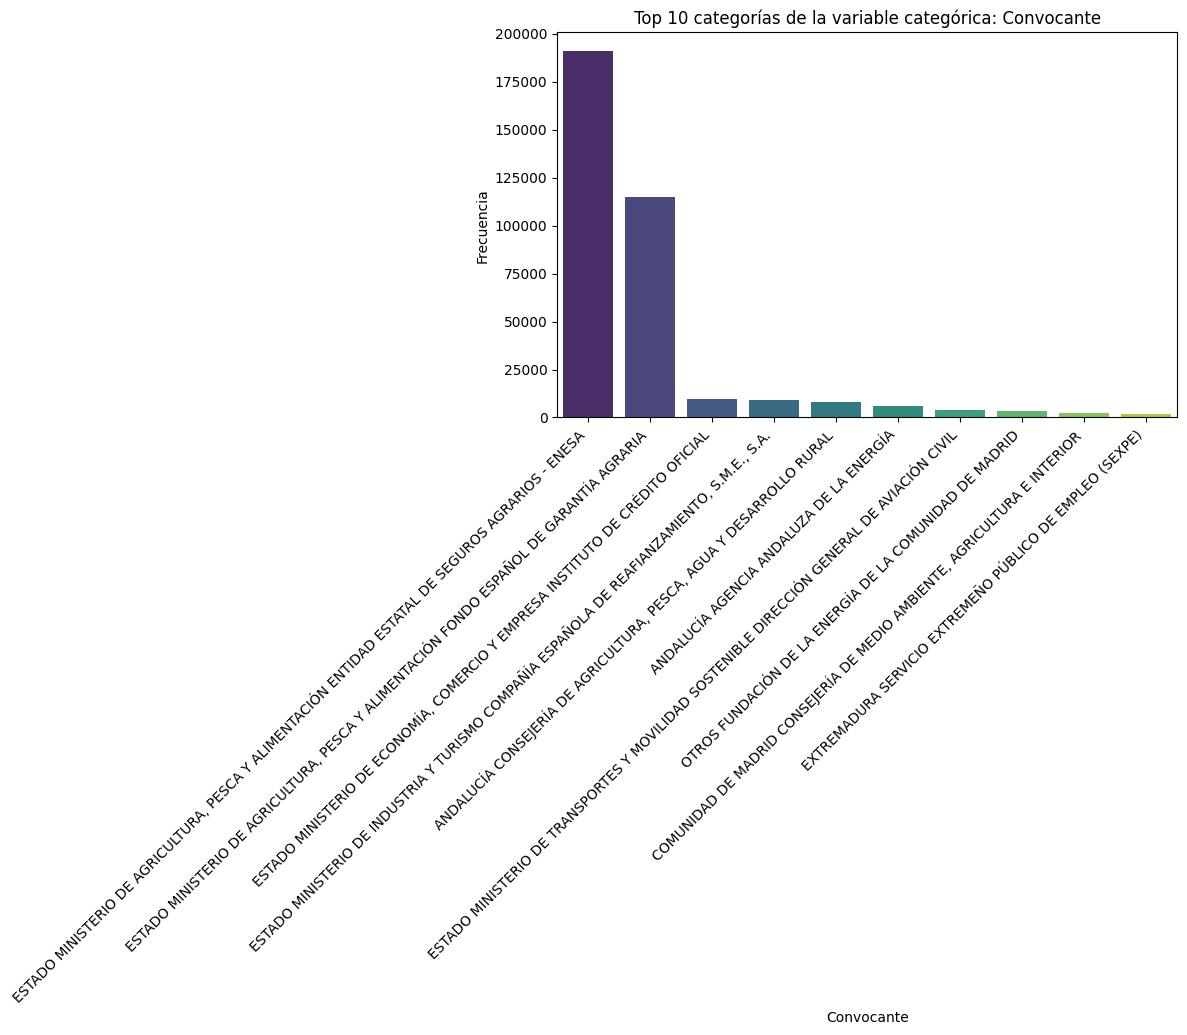

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


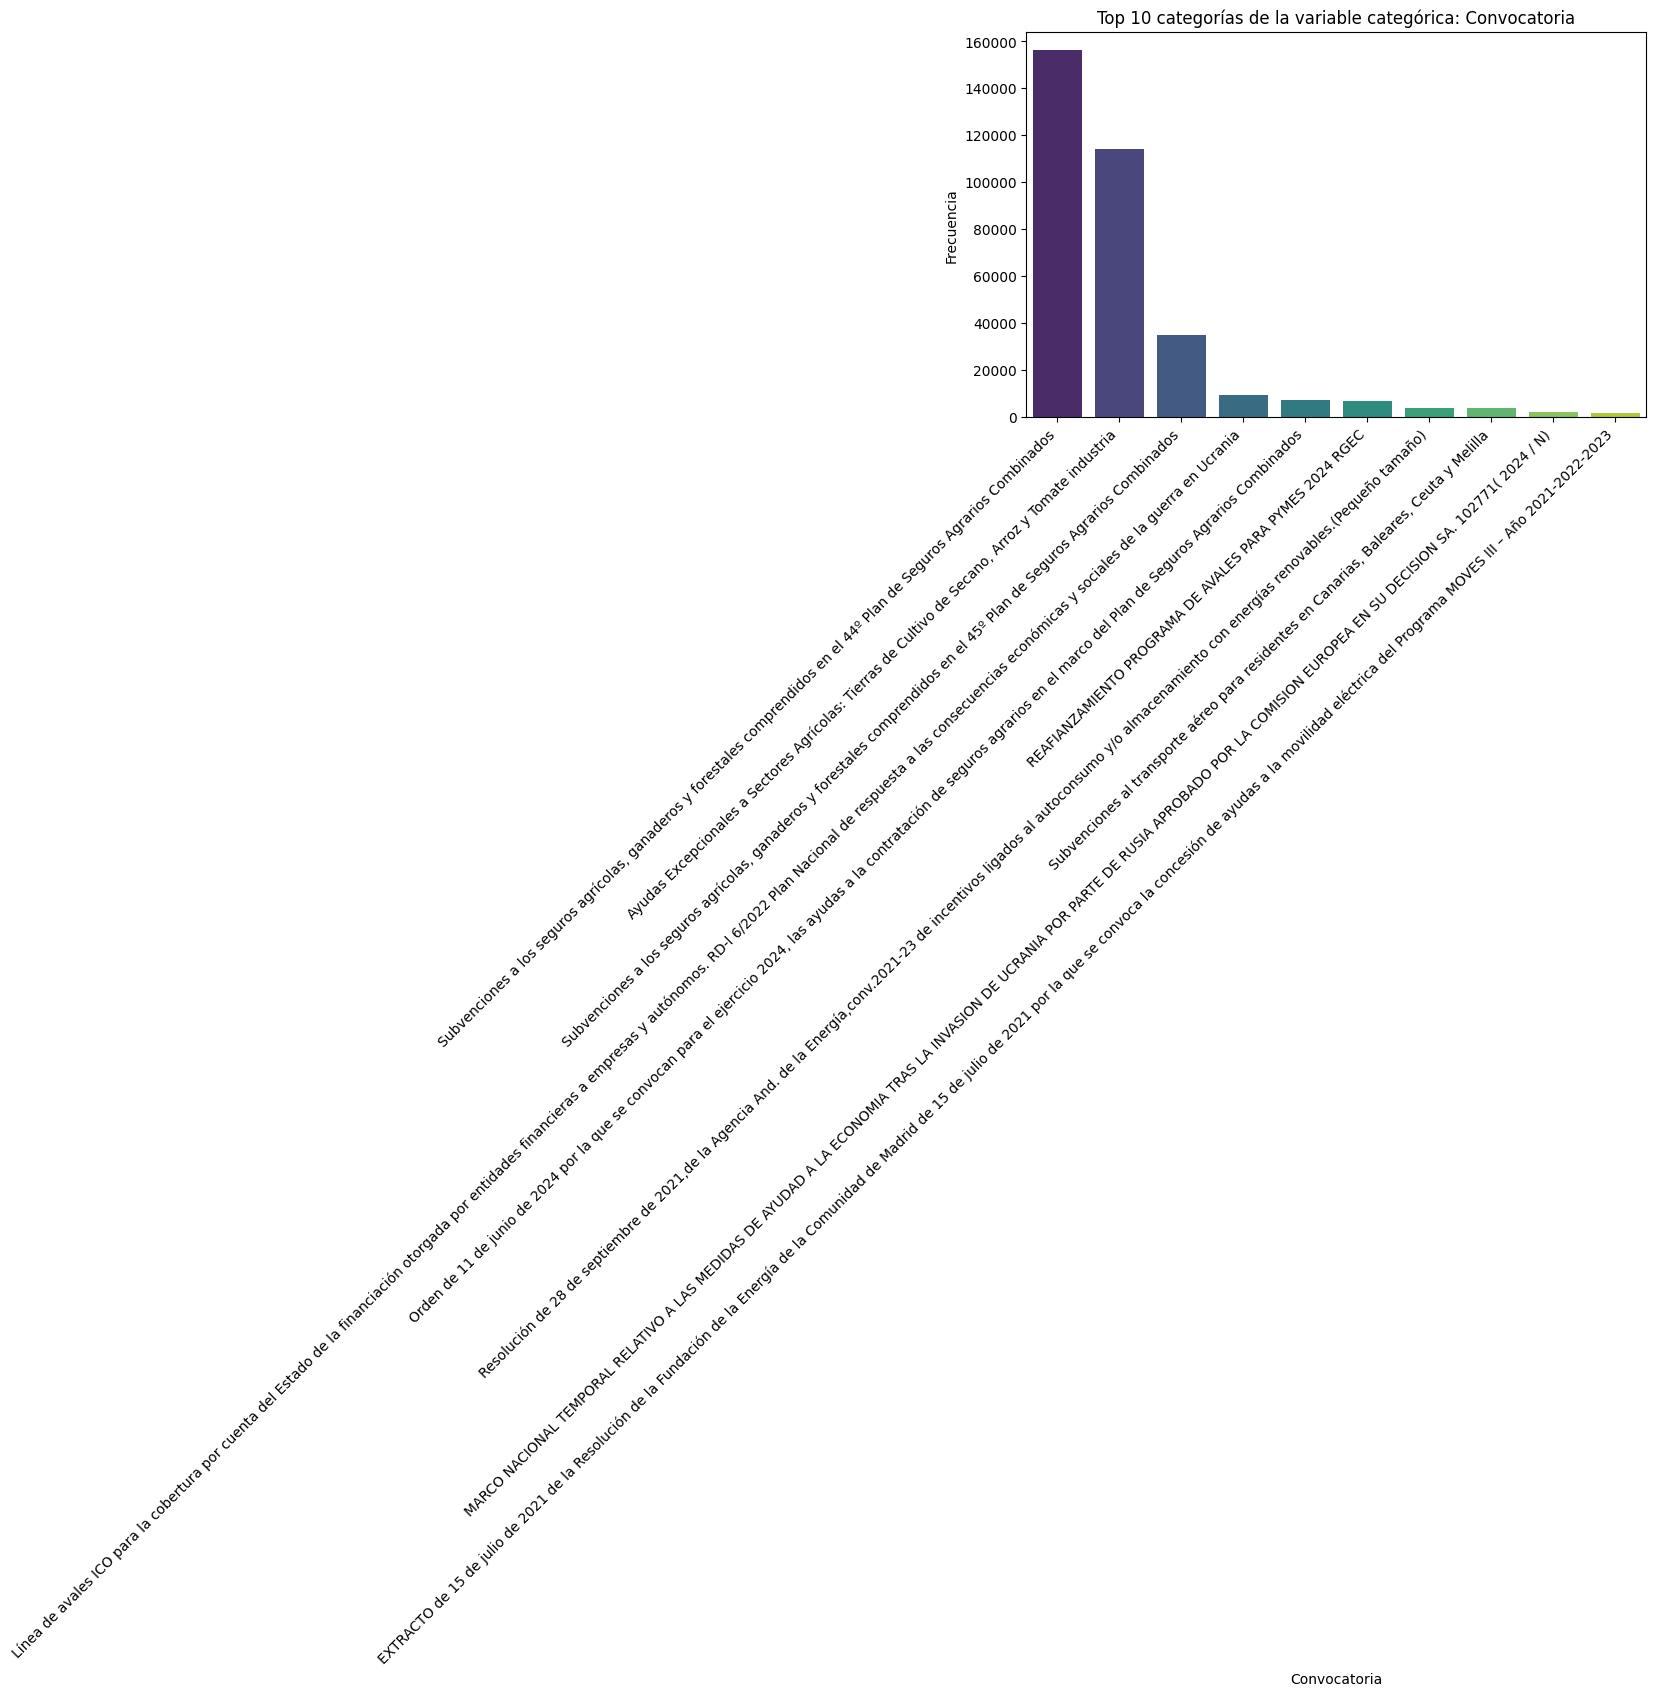

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


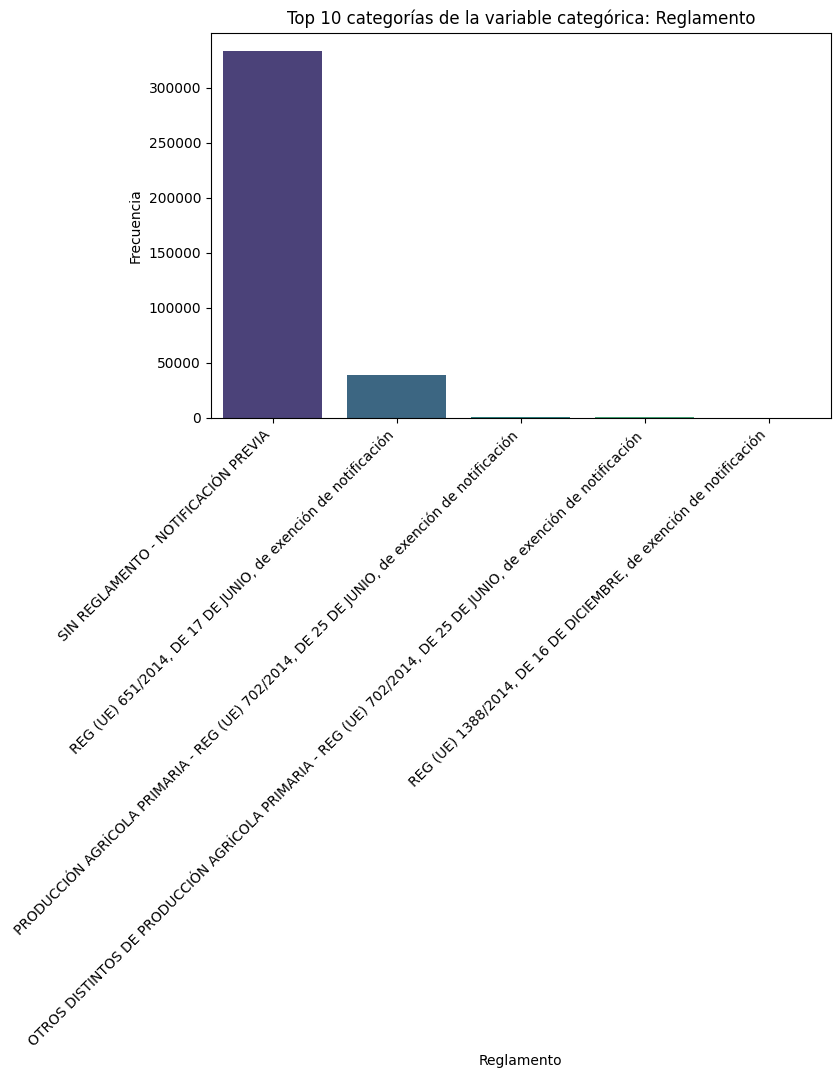

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


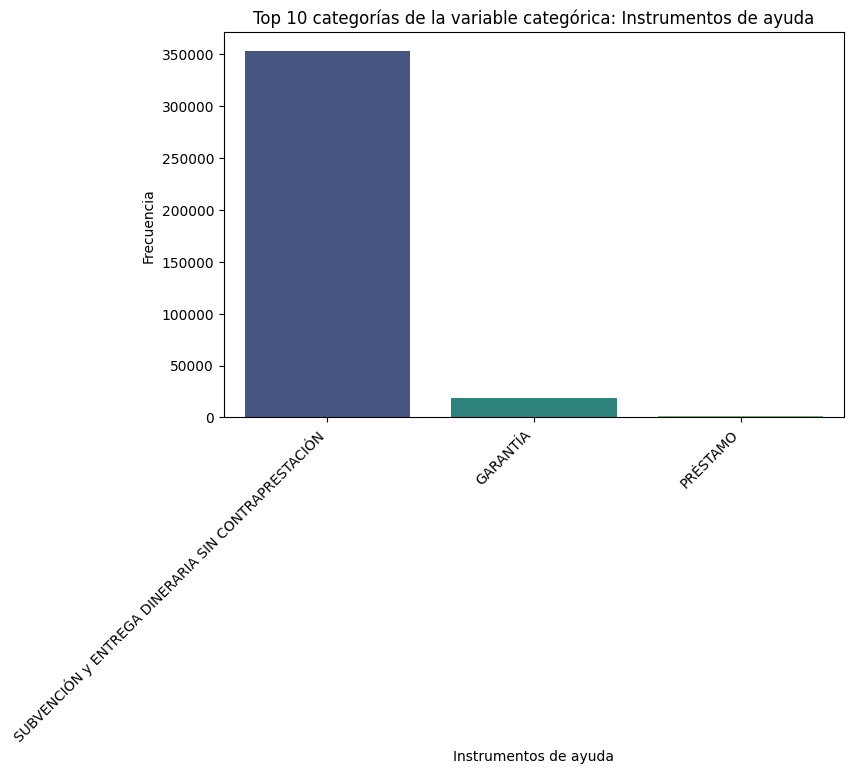

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


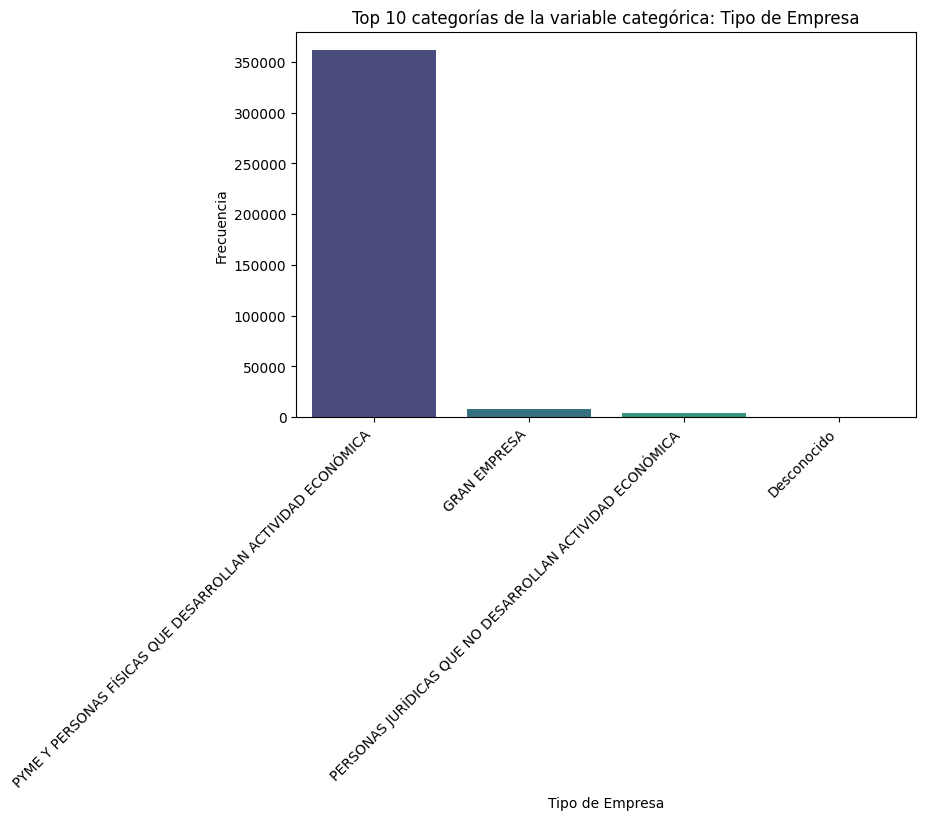

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


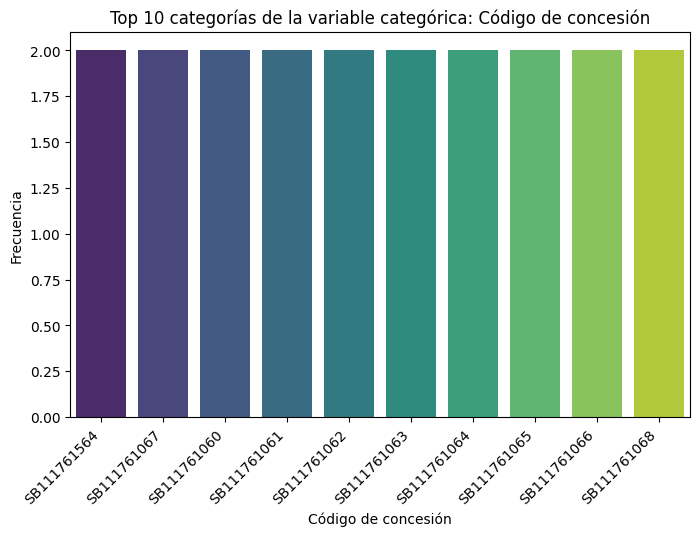

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


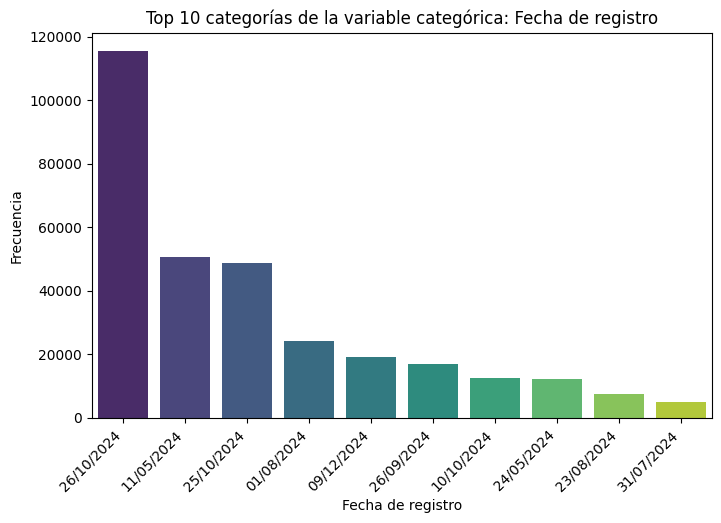

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


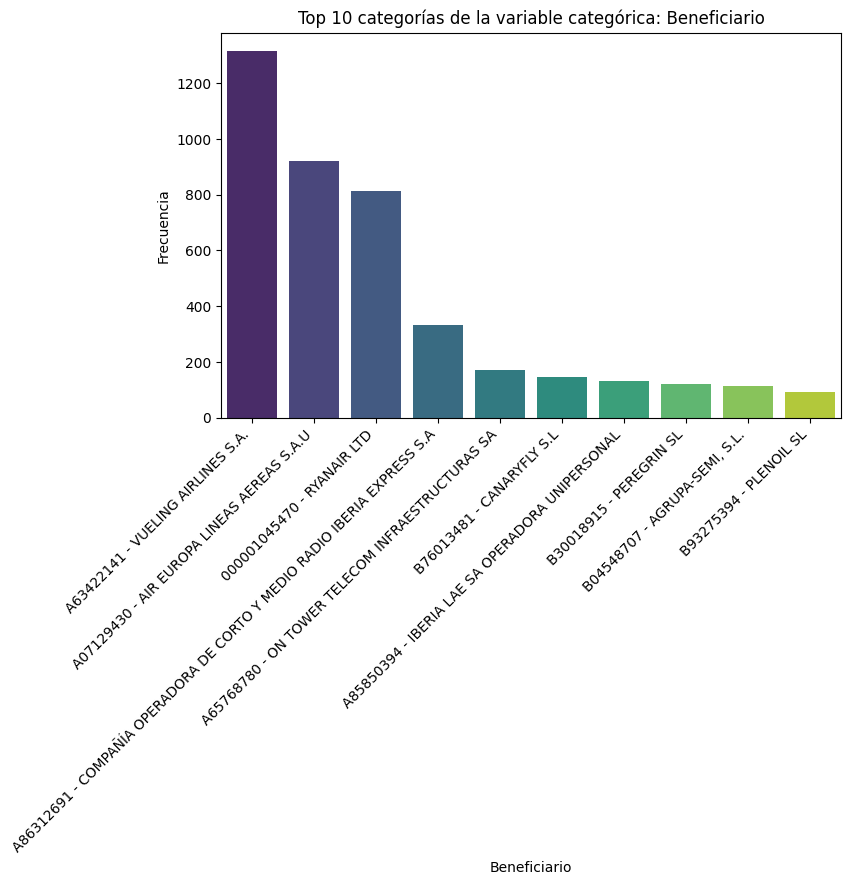

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


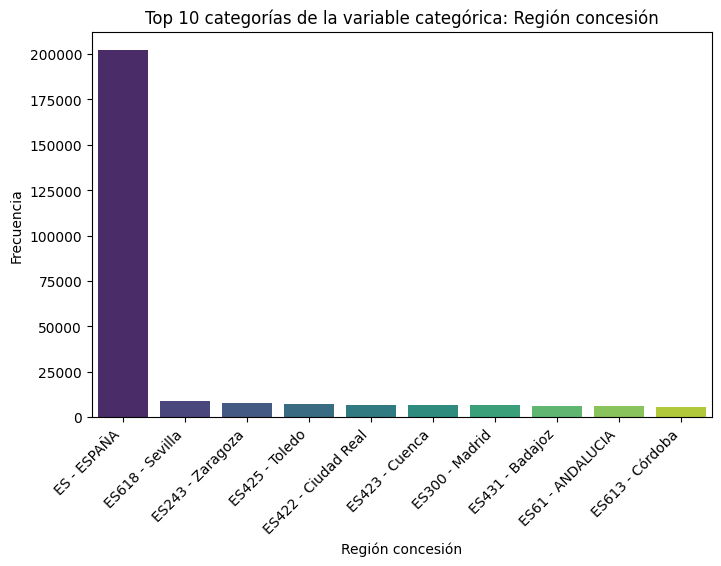

<ipython-input-25-70cb0d18728b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


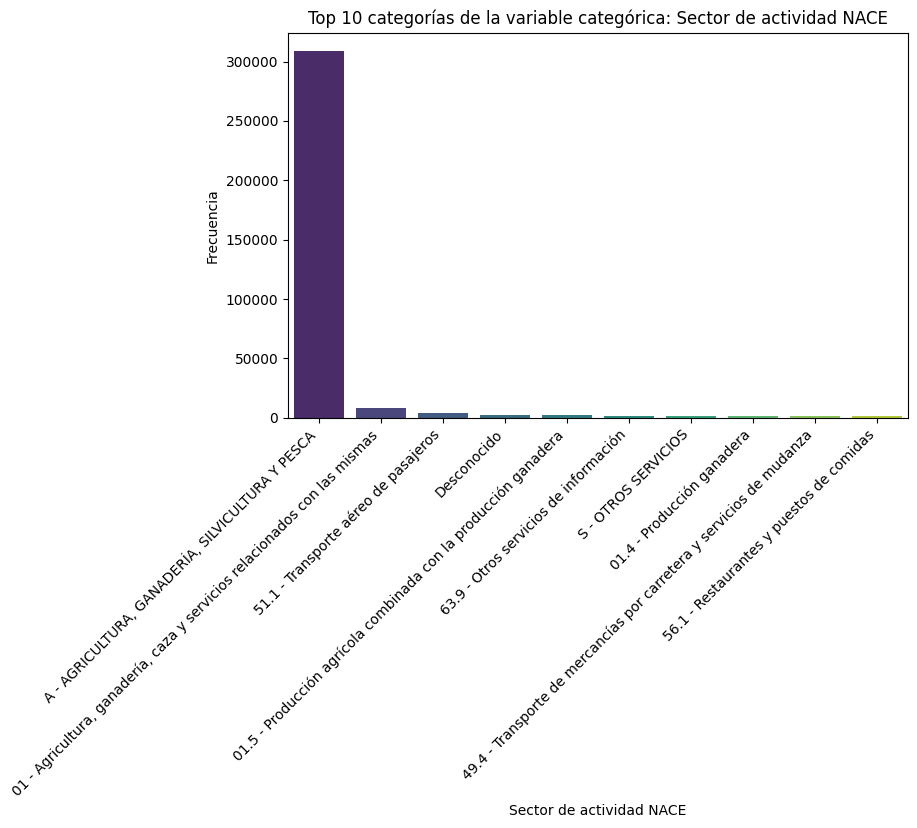

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Identificar columnas numéricas y graficar su distribución
num_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribución de la variable numérica: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# 2) Identificar columnas categóricas y mostrar el Top 10 de categorías
cat_cols = [col for col in data.columns
            if pd.api.types.is_object_dtype(data[col]) or pd.api.types.is_categorical_dtype(data[col])]

for col in cat_cols:
    # Obtener las 10 categorías con mayor frecuencia
    top_10 = data[col].value_counts().head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
    plt.title(f"Top 10 categorías de la variable categórica: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.show()




# 4. Análisis de datos

## 4.1.1. Aplicación de un modelo supervisado

Ahora que ya hemos hecho un análisis de las variables junto con su composición prinicpal o distribución, vamos a aplicar un modelo supervisado con el que predecir las etiquetas de región de concesión basado en el resto de información

### Importación de librerías de interés

In [ ]:
import numpy as np

# Para la preparación de datos y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Para evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



Para la aplicación del modelo supervisado, vamos a utilizar un Random Forest Classifier, para poder capturar las relaciones complejas entre los datos y no estar expuesto a outliers de manera tan directa como podríamos estar utilizando un modelo de Random Tree Classifier, ya que la decisión final de clasificación /asignación de etiquetas, se hace mediante un sistema de "votación" donde cada árbol ha estado expuesto a un conjunto relativamente distinto al resto, compensando el efecto que los árboles entrenados sobre datos sesgados puedan tener en el resultado.

Vamos a aplicar un label encoder que transforma cada instancia única categórica en su propio valor para poder introducirlo dentro del clasificador, podríamos "desdoblar las columnas" haciendo one-hot encoding pero este acercamiento aumentaría la dimensionalidad del análisis drásticamente (una forma de manejar este crecimiento extremo de la dimensionalidad sería aplicar una reducción por componentes principales pero no aportaría un valor diferencial e introduciría mucha complejidad computacional). Las variables numéricas no las trataremos, ya que en este estado ya aportan valor.

In [ ]:
df = data.copy()

# Definimos la columna objetivo
TARGET = 'Región concesión'

# Seleccionamos todas las columnas excepto la de la región
features = [col for col in df.columns if col != TARGET]


In [ ]:
# Ejemplo: uso de LabelEncoder para todas las columnas categóricas
cat_cols = []
for col in features:
    if df[col].dtype == object:
        cat_cols.append(col)

# Hacemos una copia para no sobreescribir
df_enc = df[features + [TARGET]].copy()


# Aplicamos LabelEncoder a las columnas categóricas, excepto a la target
encoder_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    encoder_dict[col] = le


In [ ]:
# Codificamos la columna objetivo
le_target = LabelEncoder()
df_enc[TARGET] = le_target.fit_transform(df_enc[TARGET].astype(str))

In [ ]:
# Tratamos la columna de fecha particularmente para transformarla en valor numérico
df_enc['Fecha_concesion_year'] = df_enc['Fecha de concesión'].dt.year
df_enc['Fecha_concesion_month'] = df_enc['Fecha de concesión'].dt.month
df_enc['Fecha_concesion_day'] = df_enc['Fecha de concesión'].dt.day

# Finalmente, eliminamos la columna datetime
df_enc = df_enc.drop(columns=['Fecha de concesión'])

features.remove('Fecha de concesión')
features.append('Fecha_concesion_year')
features.append('Fecha_concesion_month')
features.append('Fecha_concesion_day')

Ahora que ya tenemos todas las variables categóricas codificadas, vamos a eliminar aquellas clases que aparecen una sola vez ya que no son relevantes para nuestro análisis y no nos permiten entrenar el modelo estratificadamente, que quiere decir que todas las clases se encuentren representadas en el conjunto de entrenamiento y el de testeo

In [ ]:
# Contar cuántas veces aparece cada clase
counts = df_enc[TARGET].value_counts()

# Identificar clases minoritarias con 1 sola instancia
classes_to_remove = counts[counts < 2].index

# Eliminar filas donde la clase objetivo sea una de esas regiones
df_filtered = df_enc[~df_enc[TARGET].isin(classes_to_remove)]


df_filtered.to_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset_limpio_codificado.csv")

X = df_filtered[features]
y = df_filtered[TARGET]


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
df_filtered.info()
del df_filtered

<class 'pandas.core.frame.DataFrame'>
Index: 373838 entries, 0 to 408957
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Convocante                373838 non-null  int64  
 1   Convocatoria              373838 non-null  int64  
 2   Código BDNS               373838 non-null  int64  
 3   Reglamento                373838 non-null  int64  
 4   Instrumentos de ayuda     373838 non-null  int64  
 5   Tipo de Empresa           373838 non-null  int64  
 6   Código de concesión       373838 non-null  int64  
 7   Fecha de registro         373838 non-null  int64  
 8   Beneficiario              373838 non-null  int64  
 9   Importe nominal           373838 non-null  float64
 10  Ayuda equivalente         373838 non-null  float64
 11  Sector de actividad NACE  373838 non-null  int64  
 12  Región concesión          373838 non-null  int64  
 13  Fecha_concesion_year      373838 non-null  int32 

Empezamos ahora con el entrenamiento del modelo con los datos ya codificados

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Ahora que ya lo hemos entrenado con los datos tratados, vamos a ver qué capacidad predictiva tiene el modelo:

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     40421
           3       1.00      0.99      0.99       287
           4       0.32      0.38      0.35       123
           5       0.18      0.18      0.18        50
           6       0.29      0.21      0.24        34
           7       0.32      0.28      0.30        96
           8       1.00      0.96      0.98        47
           9       0.62      0.62      0.62       106
          10       0.83      0.96      0.89        25
          11       0.59      0.43      0.50        30
          12       1.00      0.89      0.94         9
          13       0.28      0.25      0.26       169
          14       0.35      0.27      0.31        62
          15       0.54      0.42      0.48        80
          16       0.92      0.92      0.92        12
          17       0.40      0.42      0.41       786
          18       1.00      0.99      0.99        95
          19       0.18    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Despues de probar el clasificador con balanceo de clases o sin el, vemos una ligera mejora en la clasificación global y en la ponderada por lo que vamos a continuar con este método y es el que hemos mostrado finalmente. Vemos que las clases dominantes están muy bien representadas pero le resulta muy dificil obtener información de las clases minoritarias. Esto se podría mejorar haciendo un balanceo de clases con un sobremuestreo de las poco representadas o un inframuestreo de las dominantes.

## 4.1.2. Aplicación de un modelo no supervisado

Ahora vamos a aplicar un modelo de creación de etiquetas basado en densidad, el algoritmo DBSCAN, para crear grupos que de otra manera no hubiéramos sido capaces de identificar.

In [ ]:
df['Fecha_concesion_year'] = df['Fecha de concesión'].dt.year
df['Fecha_concesion_month'] = df['Fecha de concesión'].dt.month
df['Fecha_concesion_day'] = df['Fecha de concesión'].dt.day
df_model = df[features + [TARGET]].copy()


In [ ]:
df_model.to_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset_limpio_codificado_modelo_no_supervisado.csv")

In [ ]:
df_model.head()

,Convocante,Convocatoria,Código BDNS,Reglamento,Instrumentos de ayuda,Tipo de Empresa,Código de concesión,Fecha de registro,Beneficiario,Importe nominal,Ayuda equivalente,Sector de actividad NACE,Fecha_concesion_year,Fecha_concesion_month,Fecha_concesion_day,Región concesión
0,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,SB106987200,28/05/2024,P1932400C - AYTO. TIERZO,5665.79,5665.79,Desconocido,2024,5,26,ES424 - Guadalajara
1,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,SB106987199,28/05/2024,P1932100I - AYUNTAMIENTO DE TENDILLA,6179.84,6179.84,Desconocido,2024,5,26,ES424 - Guadalajara
2,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,SB106987198,28/05/2024,P1932000A - AYTO. TARTANEDO,5383.85,5383.85,Desconocido,2024,5,26,ES424 - Guadalajara
3,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,SB106987197,28/05/2024,P1931000B - AYTO. SIGUENZA,2483.26,2483.26,Desconocido,2024,5,26,ES424 - Guadalajara
4,CASTILLA-LA MANCHA VICECONSEJERÍA DE MEDIO AMB...,"Resolución de 4 de agosto de 2022, de la Direc...",643127,SIN REGLAMENTO - NOTIFICACIÓN PREVIA,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,PERSONAS JURÍDICAS QUE NO DESARROLLAN ACTIVIDA...,SB106987196,28/05/2024,P1928100E - AYTO. RENERA,6742.01,6742.01,Desconocido,2024,5,26,ES424 - Guadalajara


Por falta de memoria en la máquina que estamos utilizando, vamos a muestrear la mitad del dataset aleatoriamente y continuar con este dataset reducido

In [ ]:
df_model = pd.read_csv(r"/content/drive/MyDrive/202412_Ciclo_de_vida_de_los_datos_PR2/adjudicaciones_2024_dataset_limpio_codificado_modelo_no_supervisado.csv")

cat_cols = []
for col in df_model.columns:
    if df_model[col].dtype == object:
        cat_cols.append(col)

In [ ]:
df_sampled = df_model.sample(frac=0.01, random_state=42)

# 2. Aplicar One-Hot Encoding en el dataset reducido
df_dummies = pd.get_dummies(df_sampled, columns=cat_cols, drop_first=True)


df_dummies.head()


,Unnamed: 0,Código BDNS,Importe nominal,Ayuda equivalente,Fecha_concesion_year,Fecha_concesion_month,Fecha_concesion_day,Convocante_ANDALUCÍA AGENCIA ANDALUZA DE LA ENERGÍA,"Convocante_ANDALUCÍA CONSEJERÍA DE AGRICULTURA, PESCA, AGUA Y DESARROLLO RURAL",Convocante_ANDALUCÍA CONSEJERÍA DE FOMENTO ARTICULACIÓN DEL TERRITORIO Y VIVIENDA,...,Región concesión_ES617 - Málaga,Región concesión_ES618 - Sevilla,Región concesión_ES62 - REGION DE MURCIA,Región concesión_ES620 - Murcia,Región concesión_ES63 - CIUDAD AUTONOMA DE CEUTA,Región concesión_ES64 - CIUDAD AUTONOMA DE MELILLA,Región concesión_ES70 - CANARIAS,Región concesión_ES705 - Gran Canaria,Región concesión_ES707 - La Palma,Región concesión_ES709 - Tenerife
15817,15817,735457,56000.00,0.00,2024,5,15,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189816,189816,742501,816.20,816.20,2024,3,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119212,119212,747601,893.92,893.92,2024,3,19,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146828,146828,747601,2845.08,2845.08,2024,3,19,False,False,False,...,False,False,False,False,False,False,False,False,False,False
254418,254418,665896,286.04,286.04,2024,1,23,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Como podemos ver, hay muchísimas columnas siguiendo el one-hot encoding, variante al LabelEncoder que hemos utilizado en el caso anterior. Con esto tenemos una explosión en la dimensionalidad que hace que no podamos manejar muchos registros con la capacidad actual. Para evitar esto vamos a reducir la dimensionalidad utilizando un proceso de Principal Component Analysis

Antes de eso, debemos estandarizar / escalar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)

Aplicamos el proceso de componentes principales sobre los datos que disponemos

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

Finalmente aplicamos el algoritmo de clusterización por densidad, para no apalancarnos en el conocido "k-means", por distancias

In [ ]:
from sklearn.cluster import DBSCAN

# Escogemos parámetros de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Entrenamos con las componentes de PCA
labels = dbscan.fit_predict(X_pca)

# DBSCAN asignará cluster 0,1,2... y -1 para outliers
labels[:20]

array([-1, -1,  0,  0,  1,  2,  0,  0, -1,  0,  0,  0,  0,  0, -1,  1,  0,
        2,  3,  1])

In [ ]:
df_sampled['cluster_dbscan'] = labels

In [ ]:
print(df_sampled['cluster_dbscan'].value_counts())

cluster_dbscan
 1     1527
 0     1155
-1      555
 3      314
 2       75
 5       40
 8       27
 4       10
 6        9
 7        9
 11       6
 9        6
 10       5
Name: count, dtype: int64


Vamos a ver ahora métricas de importe para cada uno de los grupos para ver si existen diferencias significativas entre grupos, incluso sin optimizar para maximizar esas diferencias

In [ ]:
print(df_sampled.groupby('cluster_dbscan')[['Importe nominal','Ayuda equivalente']].mean())

                Importe nominal  Ayuda equivalente
cluster_dbscan                                    
-1                131309.380883       86583.616883
 0                  2051.006026        2051.006026
 1                  1360.172639        1360.172639
 2                   524.131333         524.131333
 3                  1403.855127        1403.855127
 4                  1441.567000        1441.567000
 5                  2546.666000        2546.666000
 6                    83.783333          83.783333
 7                 16813.033333       16813.033333
 8                  1808.855926        1808.855926
 9                  4426.956667        4426.956667
 10                 2379.100000        2379.100000
 11                  166.743333         166.743333


### Conclusiones

Después de este análisis, está claro que existe un grupo de outliers claramente identificados que son aquellos que han obtenido los importes más altos de ayuda y son aquellos donde el importe nominal y la ayuda equivalente no coincide, seguramente debido a cupos de concesión máxima que no se puedan superar. Con el resto de caso, apreciamos que, aunque esten todos alrededor del mismo orden de magnitud de concesión comparados con los outliers, existen grandes diferencias entre ellos por lo que el algoritmo esta diferenciando claramente entre los distintos grupos de peticionarios.

El problema que hemos visto al utilizar este método ha sido en la fase preliminar de preprocesamiento de los datos. Aunque hemos utilizado one-hot encoding para mostrar las diferentes formas de codificar información y las ventajas de este método, principalmente que evita que el modelo interprete las diferentes clases de una columna como ordenadas, no es eficiente en términos de consumo de memoria.

## 4.2. Prueba por contraste de hipótesis

Vamos a aplicar una prueba por contraste de hipótesis para ver si la media del importe nominal es el mismo para todas las clases en el campo "Región concesión".

Esto nos indicará si la región tiene algún poder en el importe concedido, que viendo los resultados anteriores se puede intuir que así será.

Queremos aplicar ANOVA para ver si las medias de todos los grupos son iguales pero para hacer eso debemos validar que tenemos distribuciones homoscedasticas y normales

In [ ]:
import scipy.stats as st

regiones = df_model['Región concesión'].unique()

for region in regiones:
    subset = df_model.loc[df_model['Región concesión'] == region, 'Importe nominal']
    if len(subset) >= 3:  # Shapiro requiere al menos 3 puntos
        stat, p = st.shapiro(subset)
        print(f"Región: {region}, N={len(subset)} -> p-value Shapiro: {p:.4f}")


Región: ES424 - Guadalajara, N=2518 -> p-value Shapiro: 0.0000
Región: ES423 - Cuenca, N=6459 -> p-value Shapiro: 0.0000
Región: ES422 - Ciudad Real, N=6835 -> p-value Shapiro: 0.0000
Región: ES421 - Albacete, N=4436 -> p-value Shapiro: 0.0000
Región: ES425 - Toledo, N=7202 -> p-value Shapiro: 0.0000
Región: ES300 - Madrid, N=6410 -> p-value Shapiro: 0.0000
Región: ES523 - Valencia / València, N=2118 -> p-value Shapiro: 0.0000
Región: ES612 - Cádiz, N=2680 -> p-value Shapiro: 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6459.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6835.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7202.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6410.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stat

Región: ES613 - Córdoba, N=5670 -> p-value Shapiro: 0.0000
Región: ES521 - Alicante / Alacant, N=878 -> p-value Shapiro: 0.0000
Región: ES42 - CASTILLA LA MANCHA, N=49 -> p-value Shapiro: 0.0000
Región: ES212 - Gipuzkoa, N=312 -> p-value Shapiro: 0.0000
Región: ES522 - Castellón / Castelló, N=620 -> p-value Shapiro: 0.0000
Región: ES53 - ILLES BALEARS, N=4421 -> p-value Shapiro: 0.0000
Región: ES620 - Murcia, N=1610 -> p-value Shapiro: 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 202105.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5394.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6299.
  res = hypotest_fun_out(*samples, **kwds)


Región: ES - ESPAÑA, N=202105 -> p-value Shapiro: 0.0000
Región: ES30 - COMUNIDAD DE MADRID, N=5394 -> p-value Shapiro: 0.0000
Región: ES12 - PRINCIPADO DE ASTURIAS, N=236 -> p-value Shapiro: 0.0000
Región: ES532 - Mallorca, N=709 -> p-value Shapiro: 0.0000
Región: ES514 - Tarragona, N=794 -> p-value Shapiro: 0.0000
Región: ES412 - Burgos, N=4721 -> p-value Shapiro: 0.0000
Región: ES431 - Badajoz, N=6299 -> p-value Shapiro: 0.0000
Región: ES419 - Zamora, N=4195 -> p-value Shapiro: 0.0000
Región: ES220 - Navarra, N=3931 -> p-value Shapiro: 0.0000
Región: ES61 - ANDALUCIA, N=5915 -> p-value Shapiro: 0.0000
Región: ES707 - La Palma, N=187 -> p-value Shapiro: 0.0000
Región: ES709 - Tenerife, N=165 -> p-value Shapiro: 0.0000
Región: ES511 - Barcelona, N=4042 -> p-value Shapiro: 0.0000
Región: ES618 - Sevilla, N=9022 -> p-value Shapiro: 0.0000
Región: ES243 - Zaragoza, N=7694 -> p-value Shapiro: 0.0000
Región: ES242 - Teruel, N=3710 -> p-value Shapiro: 0.0000
Región: ES213 - Bizkaia, N=400 -

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5915.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9022.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7694.
  res = hypotest_fun_out(*samples, **kwds)


Región: ES114 - Pontevedra, N=481 -> p-value Shapiro: 0.0000
Región: ES513 - Lleida, N=4291 -> p-value Shapiro: 0.0000
Región: ES611 - Almería, N=1555 -> p-value Shapiro: 0.0000
Región: ES617 - Málaga, N=2227 -> p-value Shapiro: 0.0000
Región: ES111 - A Coruña, N=616 -> p-value Shapiro: 0.0000
Región: ES417 - Soria, N=2421 -> p-value Shapiro: 0.0000
Región: ES130 - Cantabria, N=148 -> p-value Shapiro: 0.0000
Región: ES614 - Granada, N=3357 -> p-value Shapiro: 0.0000
Región: ES415 - Salamanca, N=3546 -> p-value Shapiro: 0.0000
Región: ES411 - Ávila, N=2423 -> p-value Shapiro: 0.0000
Región: ES418 - Valladolid, N=4605 -> p-value Shapiro: 0.0000
Región: ES52 - COMUNIDAD VALENCIANA, N=564 -> p-value Shapiro: 0.0000
Región: ES11 - GALICIA, N=1433 -> p-value Shapiro: 0.0000
Región: ES3 - COMUNIDAD DE MADRID, N=771 -> p-value Shapiro: 0.0000
Región: ES51 - CATALUÑA, N=3624 -> p-value Shapiro: 0.0000
Región: ES113 - Ourense, N=171 -> p-value Shapiro: 0.0000
Región: ES241 - Huesca, N=4738 -> p-

Hemos visto que no tenemos una distribución normalizada para la gran mayoría de casos, así que en teoría no podríamos aplicar ANOVA. De todas maneras vamos a revisar las varianzas para completar el análisis

In [ ]:
groups = [df_model.loc[df_model['Región concesión'] == r, 'Importe nominal'].values for r in regiones]
levene_stat, levene_p = st.levene(*groups)
print(f"Levene test p-value: {levene_p:.4f}")

# Si p < 0.05, se asume que las varianzas no son iguales (no homocedásticas).


Levene test p-value: 0.0000


Un p-value por debajo de 5% lo consideramos como prueba suficiente de varianzas no iguales por lo que ANOVA no es un modelo de comparativa de medias que podamos aplicar. Vamos a utilizar un método de comparativa de medianas (no medias) no paramétrico, para poder continuar extrayendo conclusiones.

In [ ]:
h_stat, p_val = st.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}, p-value: {p_val:.4e}")


Kruskal-Wallis H-statistic: 78659.7705, p-value: 0.0000e+00


Tal y como suponiamos, la hipótesis nula (H0: Las medianas de todos los grupos son iguales) queda descartada, por lo que rechazamos la hipótesis y podemos concluir que las medianas NO son iguales para al menos dos de los grupos analizados.

| Contribuciones                      |     |
|-------------------------------------|---------------|
| Investigación previa                | PPP, MCM      |
| Redacción de las respuestas         | PPP, MCM      |
| Desarrollo del código               | PPP, MCM      |
| Participación en el vídeo           | PPP, MCM      |


| Contribuciones                      | Firmas     |
|-------------------------------------|---------------|
| Investigación previa                | PPP, MCM      |
| Redacción de las respuestas         | PPP, MCM      |
| Desarrollo del código               | PPP, MCM      |
| Participación en el vídeo           | PPP, MCM      |
